In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import torch
import numpy as np
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

#import json 
import cv2
from tqdm import tqdm  

In [3]:
images = pd.read_csv("../input/digit-recognizer/train.csv")

In [4]:
labels = np.array(images['label'])

In [5]:
images = images.iloc[:,1:].values.reshape(42000,28,28)

In [6]:
images.shape

(42000, 28, 28)

In [7]:
images.shape

(42000, 28, 28)

In [8]:
images = torch.tensor(images/255)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

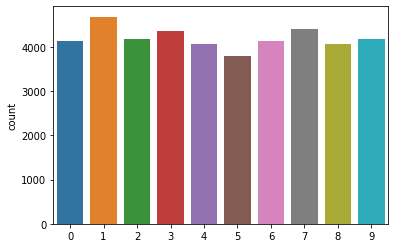

In [9]:
sns.countplot(labels)

In [10]:
images[20].shape

torch.Size([28, 28])

# Training Data

In [11]:
data = []
store1 = []
store2 = []
store3 = []
store4 = []
store5 = []
store6 = []
store7 = []
store8 = []
store9 = []

counter1 = 0 
counter2 = 0 
counter3 = 0 
counter4 = 0 
counter5 = 0 
counter6 = 0 
counter7 = 0 
counter8 = 0 
counter9 = 0 

In [12]:
same =0
diff =1

In [13]:
threshold = 2
for x in tqdm(range(len(labels))):
    
    if labels[x] ==1: # One 
        counter1 +=1
        store1.append(x)
        if counter1 ==threshold:
            data.append([images[store1[0]], images[store1[1]], same])
            store1 = []
            counter1 = 0
            
    if labels[x] ==2: # Two
        counter2 +=1
        store2.append(x)
        if counter2 ==threshold:
            data.append([images[store2[0]], images[store2[1]], same])
            store2 = []
            counter2 = 0
            
    if labels[x] ==3:
        counter3 +=1
        store3.append(x)
        if counter3 ==threshold:
            data.append([images[store3[0]], images[store3[1]], same])
            store3 = []
            counter3 = 0
            
    if labels[x] ==4:
        counter4 +=1
        store4.append(x)
        if counter4 ==threshold:
            data.append([images[store4[0]], images[store4[1]], same])
            store4 = []
            counter4 = 0
            
    if labels[x] ==5:
        counter5 +=1
        store5.append(x)
        if counter5 ==threshold:
            data.append([images[store5[0]], images[store5[1]], same])
            store5 = []
            counter5 = 0
            
    if labels[x] ==6:
        counter6 +=1
        store6.append(x)
        if counter6 ==threshold:
            data.append([images[store6[0]], images[store6[1]], same])
            store6 = []
            counter6 = 0
            
    if labels[x] ==7:
        counter7 +=1
        store7.append(x)
        if counter7 ==threshold:
            data.append([images[store7[0]], images[store7[1]], same])
            store7 = []
            counter7 = 0
            
    if labels[x] ==8:
        counter8 +=1
        store8.append(x)
        if counter8 ==threshold:
            data.append([images[store8[0]], images[store8[1]], same])
            store8 = []
            counter8 = 0
            
    if labels[x] ==9:
        counter9 +=1
        store9.append(x)
        if counter9 ==threshold:
            data.append([images[store9[0]], images[store9[1]], same])
            store9 = []
            counter9 = 0

100%|██████████| 42000/42000 [00:00<00:00, 141568.85it/s]


In [14]:
counter = 0
store = []
for x in tqdm(range(len(labels)-15000)): # From 0 to 39,998 The number is to equalize 
    if labels[x] != labels[x+1]:
        data.append([images[x], images[x+1], diff])
        counter +=1

100%|██████████| 27000/27000 [00:00<00:00, 118114.41it/s]


In [15]:
counter

24386

# Validation Data

In [16]:
data_val = []
store1 = []
store2 = []
store3 = []
store4 = []
store5 = []
store6 = []
store7 = []
store8 = []
store9 = []

counter1 = 0 
counter2 = 0 
counter3 = 0 
counter4 = 0 
counter5 = 0 
counter6 = 0 
counter7 = 0 
counter8 = 0 
counter9 = 0 

### Instead of images being gropued together when 2 of the same labels are found, images are grouped together when 3 of the same labels are found
### Specifically, we group together the 1st and the 3rd image. This makes this data batch different from the first. It also makes it smaller but thats fine

In [17]:
threshold = 3
for x in tqdm(range(len(labels))):
    
    if labels[x] ==1: # One 
        counter1 +=1
        store1.append(x)
        if counter1 ==threshold:
            data_val.append([images[store1[0]], images[store1[2]], same])
            store1 = []
            counter1 = 0
            
    if labels[x] ==2: # Two
        counter2 +=1
        store2.append(x)
        if counter2 ==threshold:
            data_val.append([images[store2[0]], images[store2[2]], same])
            store2 = []
            counter2 = 0
            
    if labels[x] ==3:
        counter3 +=1
        store3.append(x)
        if counter3 ==threshold:
            data_val.append([images[store3[0]], images[store3[2]], same])
            store3 = []
            counter3 = 0
            
    if labels[x] ==4:
        counter4 +=1
        store4.append(x)
        if counter4 ==threshold:
            data_val.append([images[store4[0]], images[store4[2]], same])
            store4 = []
            counter4 = 0
            
    if labels[x] ==5:
        counter5 +=1
        store5.append(x)
        if counter5 ==threshold:
            data_val.append([images[store5[0]], images[store5[2]], same])
            store5 = []
            counter5 = 0
            
    if labels[x] ==6:
        counter6 +=1
        store6.append(x)
        if counter6 ==threshold:
            data_val.append([images[store6[0]], images[store6[2]], same])
            store6 = []
            counter6 = 0
            
    if labels[x] ==7:
        counter7 +=1
        store7.append(x)
        if counter7 ==threshold:
            data_val.append([images[store7[0]], images[store7[2]], same])
            store7 = []
            counter7 = 0
            
    if labels[x] ==8:
        counter8 +=1
        store8.append(x)
        if counter8 ==threshold:
            data_val.append([images[store8[0]], images[store8[2]], same])
            store8 = []
            counter8 = 0
            
    if labels[x] ==9:
        counter9 +=1
        store9.append(x)
        if counter9 ==threshold:
            data_val.append([images[store9[0]], images[store9[2]], same])
            store9 = []
            counter9 = 0

100%|██████████| 42000/42000 [00:00<00:00, 266465.74it/s]


In [18]:
len(data_val) # Val data only has 11k worth of similar data

12621

In [19]:
start = len(labels)-15000

In [20]:
counter = 0
store = []
for x in tqdm(range(14999)): # From 0 to 39,998 The number is to equalize 
    if labels[start + x] != labels[start + x+1]:
        data_val.append([images[start + x], images[start + x+1], diff])
        counter +=1

100%|██████████| 14999/14999 [00:00<00:00, 246664.75it/s]


In [21]:
len(data), len(data_val) # Training data, vali data

(43317, 26100)

In [22]:
data_val[:12622][12621][2]

1

In [23]:
test = data_val[:5000] + data_val[12621:17621]

(<matplotlib.image.AxesImage at 0x7fd3d7479c10>, 1)

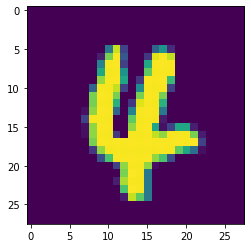

In [24]:
x= 40000
plt.imshow(data[x][1]), data[x][2]

(<matplotlib.image.AxesImage at 0x7fd3d7407bd0>, 1)

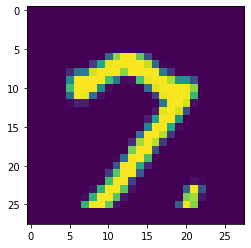

In [25]:
plt.imshow(data[x][0]), data[x][2]

In [26]:
batch_size = 128

In [27]:
from torch.utils.data import DataLoader
train_data = DataLoader(data, shuffle=True,num_workers=2,batch_size=batch_size)
val_data = DataLoader(test, shuffle=True,num_workers=2,batch_size=batch_size)

In [28]:
a,b, = 28, 28

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
def accuracy(y_true, y_pred):
    y_pred = y_pred.reshape(y_pred.shape[0],2)
    _, preds = torch.max(y_pred, dim=1)
    val = (torch.sum(preds == y_true))/len(y_true)
    return val

In [31]:
#accuracy(label, arr, threshold=.05) # The threshold tells us how strict to make our accuracy rating
# Note that accuracy does not affect the model's training in any way, only the loss function does. 

In [32]:
labels

array([1, 0, 1, ..., 7, 6, 9])

In [33]:
threshold=.05

In [34]:
drop = .5

In [35]:
# Contrastive loss = mean( (1-true_value) * square(prediction) +
#                         true_value * square( max(margin-prediction, 0) ))
def SNNLoss(y_true, y_preds, margin=1):
    square = y_preds.pow(2)
    mar = torch.pow(torch.clamp(margin - y_preds, min=0.0), 2)
    fin = (1-y_true) * square + y_true * mar
    return fin.mean()

In [36]:
labels.shape


(42000,)

In [37]:
# Generic accuracy Formula 
# Patch it up and run. Test model format to see what output looks like
# Use the test and test1 that we generated on top to test the model. Model wil be tweaked later 


In [38]:
class SNN(nn.Module):
    
    def __init__(self, inputx, inputy):
        super().__init__()


        self.network = nn.Sequential(nn.Conv2d(1,8, kernel_size=5, stride=1, padding=1), # Shape 
                                    nn.BatchNorm2d(8),
                                    nn.Tanh(),
                                    nn.MaxPool2d(2,2),
                                    nn.Dropout(drop),
                                     
                                    nn.Conv2d(8,16, kernel_size=3, stride=1, padding=1),
                                    nn.BatchNorm2d(16),
                                    nn.MaxPool2d(2,2),
                                    nn.Tanh(),
                                    nn.Dropout(drop),                               
                                                                        

                                    nn.Flatten(),

                                    nn.Linear(16*  int(26/2**2) *  int(26/2**2) , 512),

                                    nn.Tanh(),
                                    nn.Dropout(drop),
                                     
                                    nn.Linear(512,256),
                                    nn.Tanh(),
                                    nn.Dropout(drop),
                                    
                                    nn.Linear(256,10),
                                    )
        
        self.network1 = nn.Sequential(nn.Linear(1,2),
                                      nn.BatchNorm1d(1),
                                      nn.Sigmoid())

        
    def forward(self, input1, input2):

        output1 = self.network(input1.float())
        output2 = self.network(input2.float())
        x = F.pairwise_distance(output1, output2, keepdim = True)
        shape = x.shape[0]
        x = self.network1(x.reshape(shape,1,1))
        return x

    def training_batch(self, batch):
        x1, x2, label = batch
        label = torch.tensor(label)

        a,b,c = x1.shape
        x1 = x1.reshape(a,1,b,c)
        x2 = x2.reshape(a,1,b,c)
    
        if torch.cuda.is_available():
            x1, x2, label = x1.cuda(), x2.cuda(), label.cuda()

        output = self(x1,x2)
        
        loss = SNNLoss(label, torch.max(output.reshape(output.shape[0],2), dim=1)[0])
        acc = accuracy(label,output.reshape(output.shape[0],2))
        return loss, acc
    
    def validation_batch(self, batch):
        x1, x2, label = batch
        label = torch.tensor(label)

        a,b,c = x1.shape
        x1 = x1.reshape(a,1,b,c)
        x2 = x2.reshape(a,1,b,c)
    
        if torch.cuda.is_available():
            x1, x2, label = x1.cuda(), x2.cuda(), label.cuda()

        output = self(x1,x2)
        val_loss = SNNLoss(label, torch.max(output.reshape(output.shape[0],2), dim=1)[0])
        val_acc = accuracy(label, output.reshape(output.shape[0],2))
        

        return {"val_loss":val_loss,"val_acc": val_acc}
    
    def validation_average(self, output):
        
        batch_loss = [x['val_loss'] for x in output]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val_acc'].float() for x in output]
        epoch_acc = torch.stack(batch_acc).mean()
        
        return {'val_loss':epoch_loss,'val_acc':epoch_acc}
    
    
    def epoch_end(self, epoch, num_epochs,result):
        if epoch < 9:
            print('Epoch [0{}/{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.format(epoch+1,
                                                                                                                    num_epochs,
                                                                                                                    result['train_loss'],
                                                                                                                    result['train_acc'],
                                                                                                                    result['val_loss'],
                                                                                                                    result['val_acc']))
        else:
            print('Epoch [{}/{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.format(epoch+1,
                                                                                                                    num_epochs,
                                                                                                                    result['train_loss'],
                                                                                                                    result['train_acc'],
                                                                                                                    result['val_loss'],
                                                                                                                    result['val_acc']))


In [39]:
model = SNN(a,b)

In [40]:
if torch.cuda.is_available():
    model = model.cuda()
    print("Available")
else:
    print("Unavailable")

Available


In [41]:
def fit(num_epochs, model, train_data, val_data, weight_decay, lr, grad_clip=None, optimizer=torch.optim.Adam):
    
    optimizer = optimizer(model.parameters(), lr = lr, weight_decay=weight_decay)
    history = []
    torch.cuda.empty_cache()
   
    for epoch in range(num_epochs):
        model.train()
        for batch in train_data:
            loss, acc = model.training_batch(batch)
            loss.backward()
            
            
            if grad_clip == False:
                optimizer.step()
                optimizer.zero_grad()
            
            # Gradient Clipping
            if grad_clip:

                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

                optimizer.step()
                optimizer.zero_grad()                

        result = evaluate(model,val_data)
        result['train_loss'] = loss.item()
        result['train_acc'] = acc
        model.epoch_end(epoch, num_epochs, result)
        history.append(result)
    
    return history

In [42]:
@torch.no_grad()
def evaluate(model, data):
    model.eval()
    outputs = [model.validation_batch(x) for x in data] #
    return model.validation_average(outputs)

In [43]:
'''@torch.no_grad()

def evaluate(model, data):
    model.eval()
    outputs = [model.validation_batch(x) for x in data] #
    return model.validation_average(outputs)

def fit_one_cycle(epochs, max_lr, model, train, val,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                              steps_per_epoch=len(train))
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_losses = []
        train_acc = []
        lrs = []
    
        for batch in train:
            
            train_result = model.training_step(batch)
            train_losses.append(train_result['train_loss'])
            train_acc.append(train_result['train_acc'])
            train_result['train_loss'].backward()
            
            if grad_clip == False:
                optimizer.step()
                optimizer.zero_grad()

            # Gradient Clipping
            if grad_clip:

                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

                optimizer.step()
                optimizer.zero_grad()

                # Record & update learning rate
                #lrs.append(get_lr(optimizer))
                #sched.step()

        # Validation phase
        result = evaluate(model, val)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_acc'] = torch.stack(train_acc).mean().item()
        result['lrs'] = max_lr #lrs
        model.epoch_end(epoch, epochs, result)
        history.append(result)
        
        
    return history'''

"@torch.no_grad()\n\ndef evaluate(model, data):\n    model.eval()\n    outputs = [model.validation_batch(x) for x in data] #\n    return model.validation_average(outputs)\n\ndef fit_one_cycle(epochs, max_lr, model, train, val,\n                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):\n    \n    torch.cuda.empty_cache()\n    history = []\n\n    # Set up custom optimizer with weight decay\n    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)\n    \n    # Set up one-cycle learning rate scheduler\n    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,\n                                              steps_per_epoch=len(train))\n    for epoch in range(epochs):\n        # Training phase\n        model.train()\n        train_losses = []\n        train_acc = []\n        lrs = []\n    \n        for batch in train:\n            \n            train_result = model.training_step(batch)\n            train_losses.append(train_res

In [44]:
model

SNN(
  (network): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.5, inplace=False)
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Tanh()
    (9): Dropout(p=0.5, inplace=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=576, out_features=512, bias=True)
    (12): Tanh()
    (13): Dropout(p=0.5, inplace=False)
    (14): Linear(in_features=512, out_features=256, bias=True)
    (15): Tanh()
    (16): Dropout(p=0.5, inplace=False)
    (17): Linear(in_features=256, out_features=10, bias=True)
  )
  (network1): Seque

In [45]:
result0 = evaluate(model,val_data) #X_train, X_val, X_train1, X_val1
result0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


{'val_loss': tensor(0.2505, device='cuda:0'),
 'val_acc': tensor(0.5033, device='cuda:0')}

# Can work on a code that adjusts threshold of acc as the model trains 
# Keep in mind toremove threshold from the model and have it be unique to the accuracy function 

In [46]:
epochs = 100
max_lr = 1e-4
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.RMSprop

print('Epochs: {},\nLR: {}, \nGradient_Clip: {}, \nWeight_Decay {}'.format(epochs, max_lr, grad_clip, weight_decay))

Epochs: 100,
LR: 0.0001, 
Gradient_Clip: 0.1, 
Weight_Decay 0.0001


In [47]:
%%time
History = fit(epochs, model, train_data, val_data, 1e-4, max_lr, grad_clip, opt_func)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch [01/100], train_loss: 0.2193, train_acc: 0.5849, val_loss: 0.2214, val_acc: 0.5078
Epoch [02/100], train_loss: 0.2570, train_acc: 0.3962, val_loss: 0.1959, val_acc: 0.5118
Epoch [03/100], train_loss: 0.1477, train_acc: 0.6226, val_loss: 0.1833, val_acc: 0.5212
Epoch [04/100], train_loss: 0.2024, train_acc: 0.5472, val_loss: 0.1712, val_acc: 0.5392
Epoch [05/100], train_loss: 0.1610, train_acc: 0.5660, val_loss: 0.1610, val_acc: 0.5648
Epoch [06/100], train_loss: 0.1536, train_acc: 0.5660, val_loss: 0.1402, val_acc: 0.6092
Epoch [07/100], train_loss: 0.1368, train_acc: 0.5849, val_loss: 0.1272, val_acc: 0.6658
Epoch [08/100], train_loss: 0.1393, train_acc: 0.6415, val_loss: 0.1184, val_acc: 0.7046
Epoch [09/100], train_loss: 0.1589, train_acc: 0.6226, val_loss: 0.1132, val_acc: 0.7409
Epoch [10/100], train_loss: 0.1160, train_acc: 0.7170, val_loss: 0.1074, val_acc: 0.7598
Epoch [11/100], train_loss: 0.1556, train_acc: 0.6792, val_loss: 0.1017, val_acc: 0.7768
Epoch [12/100], train

Text(0.5, 1.0, 'Loss vs. No. of epochs')

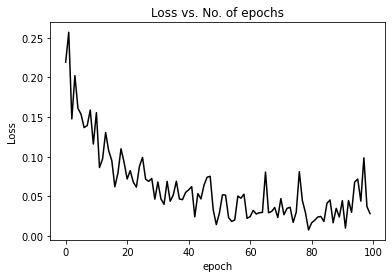

In [59]:
accuracies = [result['train_loss'] for result in History]
#accuracies.pop(-1)
plt.plot(accuracies,'-0')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs. No. of epochs')

Text(0.5, 1.0, 'Loss vs. No. of epochs')

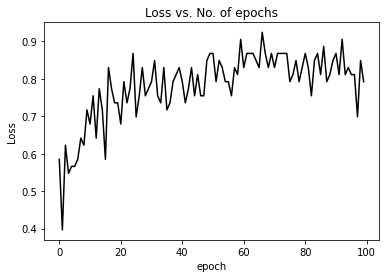

In [60]:
accuracies = [result['train_acc'].cpu() for result in History]
#accuracies.pop(-1)
plt.plot(accuracies,'-0')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs. No. of epochs')

Text(0.5, 1.0, 'Loss vs. No. of epochs')

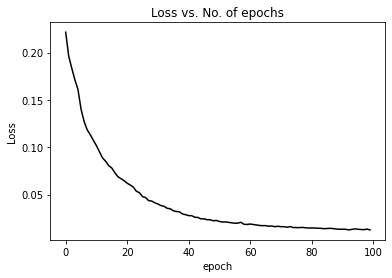

In [61]:
accuracies = [result['val_loss'].cpu() for result in History]
#accuracies.pop(-1)
plt.plot(accuracies,'-0')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs. No. of epochs')

Text(0.5, 1.0, 'Loss vs. No. of epochs')

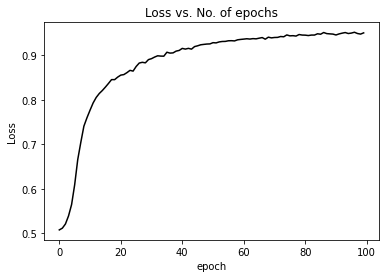

In [62]:
accuracies = [result['val_acc'].cpu() for result in History]
#accuracies.pop(-1)
plt.plot(accuracies,'-0')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs. No. of epochs')

In [63]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [64]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test = test.values.reshape(28000,28,28)
test = torch.tensor(test/255)

In [66]:
from torchvision.utils import make_grid


#### 0: 83, 100, 1, 91, 103, 106,108, 110, 111, 133, 134, 135, 161, 169,19
#### 1: 94, 114, 116, 117, 137, 164, 174, 178
#### 2: 85, 0, 90, 102, 148, 170, 179, 122
#### 3: 87, 96, 105, 118, 119, 120, 125, 130, 136, 138, 141, 151, 155, 160, 165, 168, 175
#### 4: 86, 95, 99, 112, 129, 132, 140, 142, 150, 162, 177, 180
#### 5: 107, 131, 143, 144, 152, 154, 157, 163
#### 6 : 88, 92, 93, 124, 139, 153, 167, 173
#### 7 : 89, 98, 104, 113, 115, 121, 127, 128, 146, 147, 156, 158, 158, 166, 171, 176
#### 8: 109, 123, 126, 145, 149, 159, 172, 181
#### 9: 97, 101, 2, 18

Prediction: tensor([0.0061, 0.0006], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)

SIMILAR: tensor([0.0061, 0.0006], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)


Percentage Prediction: tensor([0.5014, 0.4986], device='cuda:0', grad_fn=<SoftmaxBackward0>)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


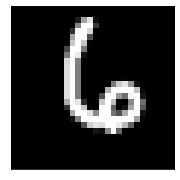

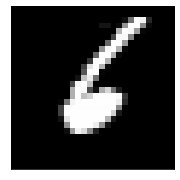

In [67]:
model.eval()
image1 = test[88]
image2 = test[124]


arr = []
arr.append([image1,image2])


for images in arr[0]:
    fig, ax = plt.subplots(figsize=(6,3))
    ax.set_xticks([]); ax.set_yticks([])
    p = torch.tensor(images.reshape(28,28,1))

    ax.imshow(make_grid(p, nrow=2), cmap='gray')


preds = model(image1.reshape(1,1,a,b).cuda(),image2.reshape(1,1,a,b).cuda())
preds = preds.reshape(-1)
print("Prediction:",preds)
_, final = torch.max(preds, dim=0)
if final ==0:
    print("\nSIMILAR:", preds)
else:
    print("DISSIMILAR:", preds)

print("\n\nPercentage Prediction:",F.softmax(preds))

Prediction: tensor([0.8396, 0.9996], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
DISSIMILAR: tensor([0.8396, 0.9996], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)


Percentage Prediction: tensor([0.4601, 0.5399], device='cuda:0', grad_fn=<SoftmaxBackward0>)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == "":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


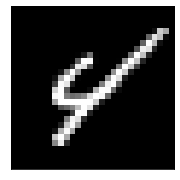

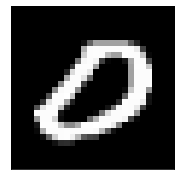

In [91]:
model.eval()
image1 = test[150]
image2 = test[134]

arr = []
arr.append([image1,image2])


for images in arr[0]:
    fig, ax = plt.subplots(figsize=(6,3))
    ax.set_xticks([]); ax.set_yticks([])
    p = torch.tensor(images.reshape(28,28,1))

    ax.imshow(make_grid(p, nrow=2), cmap='gray')


preds = model(image1.reshape(1,1,a,b).cuda(),image2.reshape(1,1,a,b).cuda())
preds = preds.reshape(-1)
print("Prediction:",preds)
_, final = torch.max(preds, dim=0)
if final ==0:
    print("\nSIMILAR:", preds)
else:
    print("DISSIMILAR:", preds)

print("\n\nPercentage Prediction:",F.softmax(preds))

In [56]:
torch.save(model.state_dict(), 'SIAMESE1.pth')
